# CCE2503 Search and Optimisation
## Assignment
### Year 2024-2025 - Semester II

* Developed by: Adrian Muscat, 2023
* Minor edits: Johann A. Briffa, 2025

---

### Write your name, ID Card Number and class below.

* Name: Graham Pellegrini
* ID Number: 0352804L
* Class: CE

---

## Instructions:

In this assignment you will be looking for a minimiser for the 2D Griewangk
function using the following methods. 

1. Standard Gradient descent
2. Random search
3. Random Search + Gradient descent
4. Simulated annealing

You will also draw convergence plots and compare the methods with each other.

You may be using some of the functions you had developed during the preparatory
stage, e.g. standard gradient descent and python boilerplate code for plotting
contour surfaces, 3D wireframes, timing code, counting function calls etc. 

## Notes: 

1. With the exception of Gradient Descent, for which you shall modify the one in
   the preparatory exercises notebook, program all optimisation algorithms from
   scratch.

2. You can only make use of the python packages included in the notebook in its
   original form, i.e. ('matplotlib.pyplot', 'mpl_toolkits.mplot3d', 'numpy' and
   'time')

3. Cite any blogs, code repositories and/or generative AI tools (e.g. ChatGPT)
   used in completing this assignment. In the case of generative AI tools,
   explain how these tools were used.

4. This work is to be attempted individually. It is essential that the work you
   eventually submit and present for your assignment consists only of your own
   work; use of copied material will be treated as plagiarism. Discussion is
   only permitted on general issues, and it is absolutely forbidden to discuss
   specific details with anyone and/or share results.

5. Please sign the plagiarism form that can be found here:
   https://www.um.edu.mt/ict/students/formsguidelines/

6. Your submission consists of two components:
   * The python notebook, with all cells executed.
   * The signed plagiarism form.

---

## Preparation:

In [34]:
# We first load the required modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import time

The Griewangk function is:

$G(\mathbf{x}) = 1 + \frac{1}{4000}x_1^2 + \frac{1}{4000}x_2^2 - 
cos(x_1)cos(\frac{\sqrt(2)}{2}x_2)$

In [35]:
# Define objective function to minimize
def Griewangk(x, a=1, b=5):
    """
    Rosenbrock's function is a 2D uni-modal function
    This implementation follows the definition in Kochenderfer & Wheeler, 2019
    x : x is a numpy array of dimensions [2,m], where m is the number of 2D points
    """
    return 1+ x[0]**2/4000 + x[1]**2/4000 - np.cos(x[0])*np.cos(0.5*x[1]*np.sqrt(2))

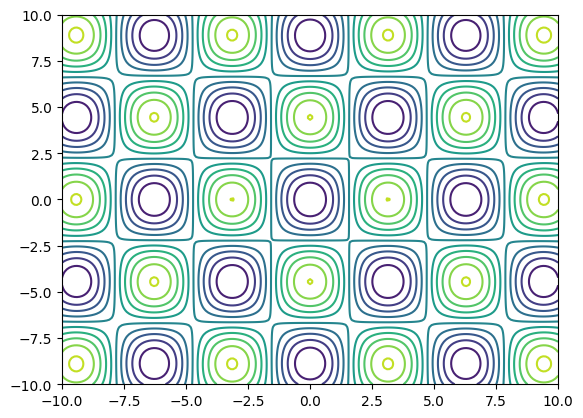

In [36]:
# Plot contour plot in the search space (xmin=-10, ymin=-10), (xmin=10, ymin=10)
N=201
limit=10
xx = np.linspace(-limit, limit, N)
yy = np.linspace(-limit, limit, N)
X = np.repeat(xx,N).reshape(N,N)
Y = np.tile(yy,N).reshape(N,N)
#
x = np.column_stack((X.flatten(),Y.flatten())).T
Z = Griewangk(x).reshape(N,N)
#
plt.contour(X,Y,Z, levels=10)

In [37]:
# Find the location of the minimum value in Z
print(Z.shape)
idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
print(idx, '(',X[idx], ', ', Y[idx],')', Z[idx])
print('Therefore global minimum is at (0.0, 0.0)')

(201, 201)
(np.int64(100), np.int64(100)) ( 0.0 ,  0.0 ) 0.0
Therefore global minimum is at (0.0, 0.0)


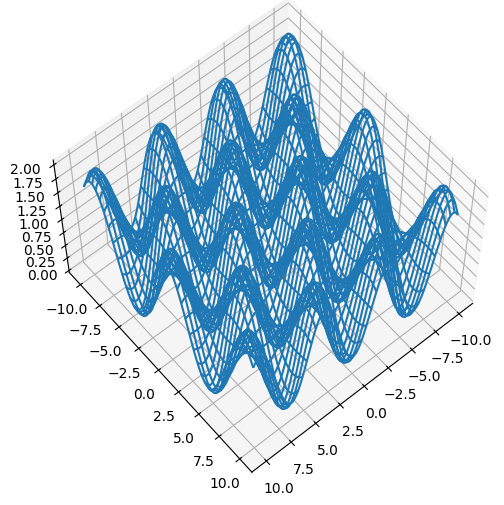

In [38]:
# Plot a 3D wireframe of the objective function
#
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, cmap=cm.jet)
#ax.plot_wireframe(X, Y, np.log(Z), rstride=2, cstride=2)
#ax.view_init(0, 90) # elevation, azimuth
ax.view_init(60, 50) # elevation, azimuth


In [39]:
# Random seed for reproducibility
# Comment out for different results, to see the nature of stochastic algorithms
np.random.seed(0)
#np.random.seed(42)
#np.random.seed(99)

---
## Q1

Modify the gradient descent algorithm with the derivate of the $G(\mathbf{x})$ and starting from a random position in the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$, find a minimiser of $G(\mathbf{x})$. 

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

$$
G(\mathbf{x}) = 1 + \frac{1}{4000}x_1^2 + \frac{1}{4000}x_2^2 - 
\cos(x_1)\cos\left(\frac{\sqrt{2}}{2}x_2\right)
$$

- $x_1$ and $x_2$ are the two input variables of the function.  
- $G(\mathbf{x})$ function to minimize.

**$x_1$ partial derivative:**

$$
\frac{\partial G}{\partial x_1} = \frac{1}{2000}x_1 + \sin(x_1)\cos\left(\frac{\sqrt{2}}{2}x_2\right)
$$

**$x_2$ partial derivative:**

$$
\frac{\partial G}{\partial x_2} = \frac{1}{2000}x_2 + \cos(x_1)\cdot\frac{\sqrt{2}}{2}\cdot\sin\left(\frac{\sqrt{2}}{2}x_2\right)
$$

**Gradient vector:**

$$
\nabla G(\mathbf{x}) =
\begin{bmatrix}
\frac{1}{2000}x_1 + \sin(x_1)\cos\left(\frac{\sqrt{2}}{2}x_2\right) \\
\frac{1}{2000}x_2 + \frac{\sqrt{2}}{2}\cos(x_1)\sin\left(\frac{\sqrt{2}}{2}x_2\right)
\end{bmatrix}
$$

This gradient can now be used in the gradient descent algorithm to iteratively minimize $G(\mathbf{x})$.


In [40]:
# Now we can encapsulate the gradient step from the calculation of the gradient
def gradient_step(x, alpha):
    
    # Partial derivatives of the Griewangk function
    dx = (1/2000)*x[0] + np.sin(x[0]) * np.cos((np.sqrt(2)/2) * x[1])
    dy = (1/2000)*x[1] + (np.sqrt(2)/2) * np.cos(x[0]) * np.sin((np.sqrt(2)/2) * x[1])

    # Gradient vector
    grad = np.array([dx, dy])

    # Update x using gradient descent
    return x - alpha * grad

In [41]:
# Updated gradient descent algorithm to use the respective gradient
def grad_descent(alpha=0.1, iterations=20):
    
    # Randomly initialize x0 in the range [-10, 10] (once per run)
    x= np.random.uniform(-10, 10, size=2)

    # Initialize history of objective values
    history = np.zeros(iterations)

    # Iterate over the number of iterations 
    for i in range(iterations):

        # Perform gradient step
        x = gradient_step(x, alpha)

        # Store objective value making use of the predefined function
        history[i] = Griewangk(x)

    return history


Standard deviation of final values after 100 iterations: 0.01260


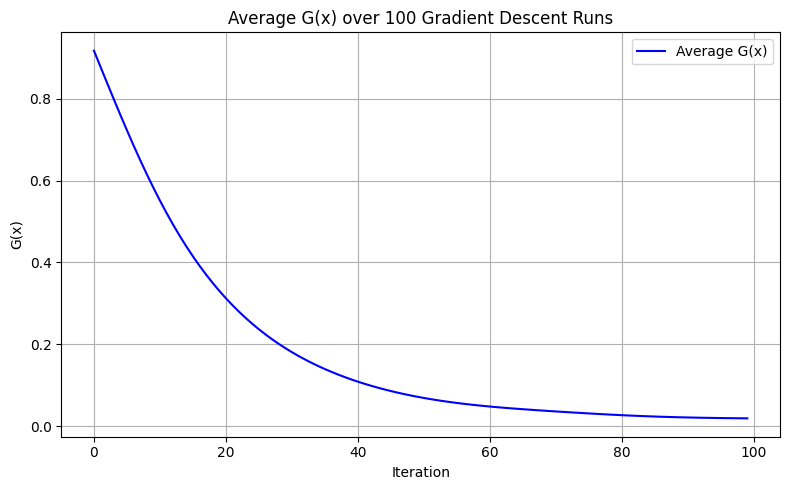

In [42]:
runs = 100 # Executing the process for 100 times
iterations = 100 # Increased iterations from 20 to 100
alpha = 0.1 # Same alpha as before

# Initialize an array to store the results of each run
gd_runs = np.zeros((runs, iterations))

# Execute the gradient descent algorithm for 100 runs
for r in range(runs):

    # Run gradient descent and store the result
    gd_runs[r] = grad_descent(alpha, iterations)

# Average G(x) values over all runs
avg_gx = np.mean(gd_runs, axis=0)

# Standard deviation of final G(x) values
std_gd = np.std(gd_runs[:, -1])
print(f"Standard deviation of final values after {iterations} iterations: {std_gd:.5f}")

# Plot the average G(x) over 100 runs
plt.figure(figsize=(8, 5))
plt.plot(avg_gx, label='Average G(x)', color='blue')
plt.title('Average G(x) over ' + str(runs) + ' Gradient Descent Runs')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

A gradient step function was defined for the Griewangk function. This was then used within the modifed function from the preparatory exercises notebook. An increase in the iterations from 20 to 100 was made so that the algorithm would have more time to converge. The results were then averaged over 100 runs and plotted. The standard deviation of the final G(x) values was also calculated to assess the variability of the results.

---

## Q2

Implement a random search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [15 marks]

In [43]:
# Random search for minimizing Griewangk function
def random_search(iterations=100):
    # Initialize best value tracker and history array
    best_val = float('inf')
    history = np.zeros(iterations)

    # Iterate over the number of iterations
    for i in range(iterations):

        # Generate random x in the range [-10, 10] (once per iteration)
        x = np.random.uniform(-10, 10, size=2)

        # Evaluate the objective function
        val = Griewangk(x)

        # Update best value if current value is lower
        if val < best_val:
            best_val = val
            
        # Store the best value in history
        history[i] = best_val

    return history  

Standard deviation of final values after 100 iterations: 0.02543


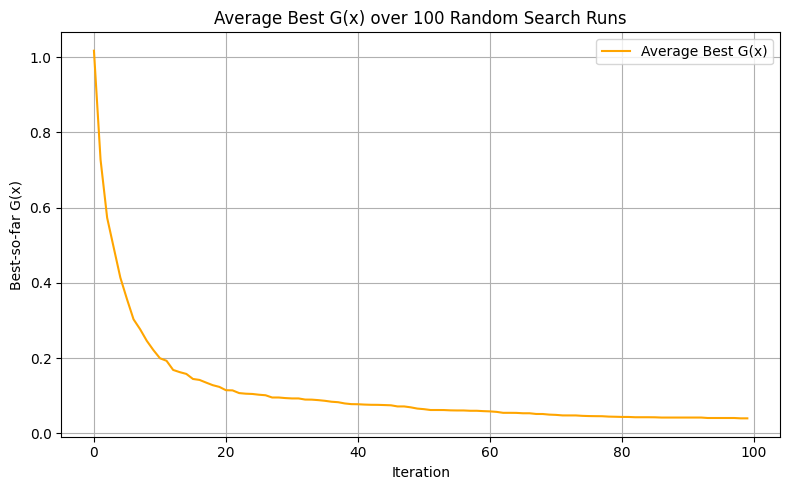

In [44]:
runs = 100 # Constant number of runs
iterations = 100 # Constant number of iterations

# Initialize an array to store the results of each run
rs_runs = np.zeros((runs, iterations)) 

for r in range(runs):
    rs_runs[r] = random_search(iterations=iterations)

# Average and std of G(x) values over all runs
avg_gx = np.mean(rs_runs, axis=0)
std_rs = np.std(rs_runs[:, -1])

# Print the standard deviation of final G(x) values
print(f"Standard deviation of final values after {iterations} iterations: {std_rs:.5f}")

# Plot the average G(x) over 100 runs
plt.figure(figsize=(8, 5))
plt.plot(avg_gx, label='Average Best G(x)', color='orange')
plt.title('Average Best G(x) over ' + str(runs) + ' Random Search Runs')
plt.xlabel('Iteration')
plt.ylabel('Best-so-far G(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

A simple random search algorithm function was defined. We note how for random search, we define a random point in the search space for each iteration, and we keep track of the best value found so far. Compared to the gradient descent algorithm, where a random point is only defined once (per run). The same plot and values as in the gradient decent where obtained to be compared at the end.

---

## Q3

Implement a two step approach:

1. In the first step carry out a random search and find minimiser $\mathbf{x}_{initial}^*$, within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.
2. In the second step use gradient descent and starting from $\mathbf{x}_{initial}^*$ find minimiser $\mathbf{x}_{final}^*$  within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [10 marks]



In [45]:
# Hybrid optimizer: Random Search + Gradient Descent
def hybrid_optimizer(random_steps=50, gd_steps=50, alpha=0.05):
    # Initialize best values
    best_val = float('inf')
    best_x = None

    # Initialize history of objective values
    history = np.zeros(random_steps + gd_steps)

    # Conduct random search
    for i in range(random_steps):

        # Generate random x in the range [-10, 10] (once per iteration)
        x = np.random.uniform(-10, 10, size=2)

        # Evaluate the objective function
        val = Griewangk(x)

        # Update best value if current value is lower
        if val < best_val:
            # Update best value
            best_val = val
            # Update best x
            best_x = x

        # Store the best value in history
        history[i] = best_val  # track best value at each RS step

    # We do not need to reinitialize x here for gradient descent as it is taken from the best x found in random search
    # Copy best x found during random search to x for gradient descent
    x = best_x.copy()
    # Perform gradient descent from the best x found
    for i in range(gd_steps):
        # Perform gradient step
        x = gradient_step(x, alpha)
        # Store objective value
        history[random_steps + i] = Griewangk(x)

    return history


Standard deviation of final values after 100 iterations: 0.01103


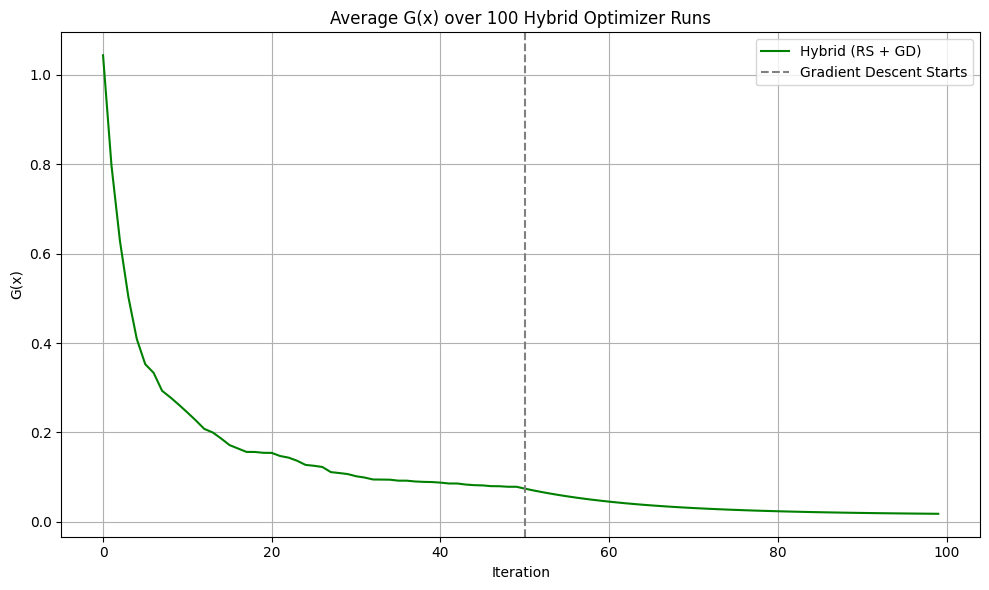

In [46]:
runs = 100 # Total number of runs remains 100
rs_steps = 50 # Random search steps
gd_steps = 50 # Gradient descent steps
total_steps = rs_steps + gd_steps

# Initialize an array to store the results of each run
hy_runs = np.zeros((runs, total_steps))

# Execute the hybrid optimizer for 100 runs
for r in range(runs):
    hy_runs[r] = hybrid_optimizer(rs_steps, gd_steps, alpha=0.05)

# Average and std of G(x) values over all runs
avg_gx = np.mean(hy_runs, axis=0)
std_hy = np.std(hy_runs[:, -1])

# Standard deviation of final G(x) values
print(f"Standard deviation of final values after {total_steps} iterations: {std_hy:.5f}")

# Plot the average G(x) over 100 runs
plt.figure(figsize=(10, 6))
plt.plot(avg_gx, label='Hybrid (RS + GD)', color='green')
# Plot a dividing line between random search and gradient descent
plt.axvline(rs_steps, linestyle='--', color='gray', label='Gradient Descent Starts')
plt.title('Average G(x) over ' + str(runs) + ' Hybrid Optimizer Runs')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The hybrid optimizer is a combination of random search and gradient descent. It aims to cover the known downside of the gradient descent algorithm, which is that it can get stuck in local minima. By first performing a random search, the algorithm can explore the search space more broadly and potentially find a better starting point for gradient descent. The same metrics and plot are noted. Having divider in the plot helps to visualize the transition from random search to gradient descent. The gradient descent naturally shows a more steady convergence than the random search does as seen in the previous plots too.

---

## Q4 

Implement a simulated annealing search algorithm  to find a minimiser of $G(\mathbf{x})$ within the search space $(xmin=-10, ymin=-10), (xmax=10, ymax=10)$.

Execute the process 100 times and plot the average value of $G(\mathbf{x})$ at each iteration. In addition compute the standard deviation of the final values. 

### [30 marks]

In [47]:
# Simulated Annealing for minimizing Griewangk function
def simulated_annealing(iterations=100, temp_start=1.0, temp_end=0.01):

    # Randomly initialize x0 in the range [-10, 10] (once per run)
    x = np.random.uniform(-10, 10, size=2)

    # Initialize current value and best value
    current_val = Griewangk(x)
    best_val = current_val

    # Initialize history of objective values
    history = np.zeros(iterations)

    # Iterate over the number of iterations
    for i in range(iterations):

        # Cooling schedule (exponential decay)
        temp = temp_start * (temp_end / temp_start) ** (i / iterations)

        # Small random step (perturbation)
        x_new = x + np.random.normal(0, 0.5, size=2)
        x_new = np.clip(x_new, -10, 10)

        # Evaluate the objective function at the new point
        new_val = Griewangk(x_new)

        # Calculate the change in value
        delta = new_val - current_val

        # Accept new point if better or with probability
        if delta < 0 or np.random.rand() < np.exp(-delta / temp):
            x = x_new
            current_val = new_val

        # Update best if needed
        if current_val < best_val:
            best_val = current_val
            
        # Store the best value in history
        history[i] = best_val

    return history

Standard deviation of final values after 100 iterations: 0.00993


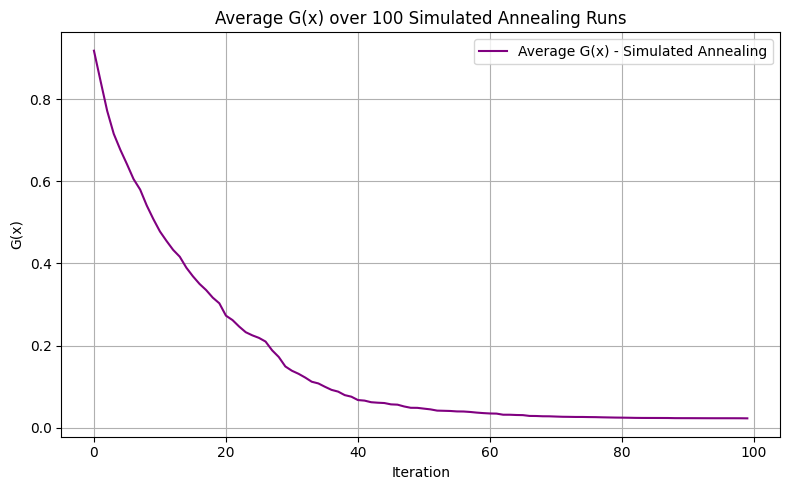

In [48]:
runs = 100 # Number of runs
iterations = 100 # Number of iterations

# Initialize an array to store the results of each run
sa_runs = np.zeros((runs, iterations))

# Execute the simulated annealing algorithm for 100 runs
for r in range(runs):
    # Run simulated annealing and store the result
    sa_runs[r] = simulated_annealing(iterations=iterations)

# Average and std of G(x) values over all runs
avg_gx = np.mean(sa_runs, axis=0)
std_sa = np.std(sa_runs[:, -1])
# Print the standard deviation of final G(x) values
print(f"Standard deviation of final values after {iterations} iterations: {std_sa:.5f}")

# Plot the average G(x) over 100 runs
plt.figure(figsize=(8, 5))
plt.plot(avg_gx, label='Average G(x) - Simulated Annealing', color='purple')
plt.title('Average G(x) over ' + str(runs) + ' Simulated Annealing Runs')
plt.xlabel('Iteration')
plt.ylabel('G(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

 A generic Simulated Annealing function is defined above using cooling schedule. The algorithm essentially samples a random point in the search space. It calculates the change in the objective function value. If the new point is better, it is accepted. If not, it may still be accepted with a certain probability based on the temperature. The temperature is a measure of acceptance that decreases over time. Essentailly allowing the algorithm to explore the search space without being overly greedy. The same plot and values where saved for the final evaluation of the algorithms.

---

## Q5

Superimpose all plots from all four optimisation methods and compare the algorithms in terms of rate of convergence, effectiveness and robustness.

### [30 marks]

Gradient Descent final std: 0.01260
Random Search final std: 0.02543
Hybrid final std: 0.01103
Simulated Annealing final std: 0.00993


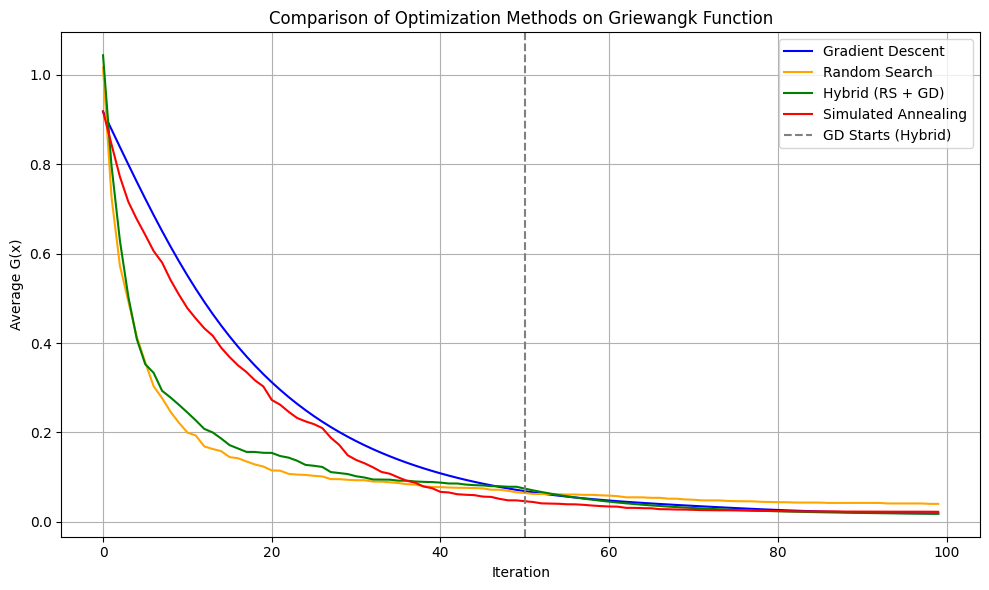

In [49]:
# Compute average curves from each optimizer
avg_gd = np.mean(gd_runs, axis=0)
avg_rs = np.mean(rs_runs, axis=0)
avg_hy = np.mean(hy_runs, axis=0)
avg_sa = np.mean(sa_runs, axis=0)

# Print all the final standard deviations of each method
print(f"Gradient Descent final std: {std_gd:.5f}")
print(f"Random Search final std: {std_rs:.5f}")
print(f"Hybrid final std: {std_hy:.5f}")
print(f"Simulated Annealing final std: {std_sa:.5f}")

# Plot all in one figure
plt.figure(figsize=(10, 6))
plt.plot(avg_gd, label='Gradient Descent', color='blue')
plt.plot(avg_rs, label='Random Search', color='orange')
plt.plot(avg_hy, label='Hybrid (RS + GD)', color='green')
plt.plot(avg_sa, label='Simulated Annealing', color='red')
plt.axvline(x=50, color='gray', linestyle='--', label='GD Starts (Hybrid)')
plt.title('Comparison of Optimization Methods on Griewangk Function')
plt.xlabel('Iteration')
plt.ylabel('Average G(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Stochastic Optimization Random Natrue

Due to the randomized nature of all the optimization algorithms, final performance metrics may vary slightly with each full run of the notebook. This variability is expected in stochastic optimization and highlights the importance of analyzing performance over many runs and trials.

To illustrate this, we ran each optimizer using three different fixed random seeds: `0`, `42`, and `99`.

| Seed | Gradient Descent | Random Search | Hybrid (RS + GD) | Simulated Annealing |
|------|------------------|---------------|------------------|----------------------|
| 0    | 0.01260          | 0.02543       | 0.01103          | 0.00993              |
| 42   | 0.01149          | 0.02666       | 0.01161          | 0.01225              |
| 99   | 0.01614          | 0.02330       | 0.01044          | 0.01170              |

- **Seed 0**:  
  Simulated Annealing had the lowest standard deviation (0.00993), indicating very stable performance across runs. The hybrid method followed closely (0.01103), while Random Search showed the most fluctuation (0.02543), consistent with its blind search nature.

- **Seed 42**:  
  Here, Gradient Descent produced the most stable results (0.01149), slightly outperforming the hybrid. Interestingly, Simulated Annealing exhibited a slight increase in variance (0.01225) compared to seed 0, possibly due to a less favorable initialization path.

- **Seed 99**:  
  The Hybrid method achieved the lowest deviation (0.01044), reinforcing its consistency. Gradient Descent and Simulated Annealing showed moderate variance, while Random Search remained the least stable.

### Overall Evaluation

Across all seeds, the **Hybrid (RS + GD)** method consistently demonstrated the lowest or near-lowest standard deviation, making it the most robust and reliable optimizer in this study. Its combination of global exploration (via random search) and local refinement (via gradient descent) allows it to avoid poor local minima while still converging efficiently.

**Simulated Annealing** showed competitive performance, particularly under certain seeds like `0`, where it even outperformed the hybrid method. This confirms its strength in escaping local minima thanks to its probabilistic acceptance of worse solutions during early iterations.

**Gradient Descent**, while simple and fast, showed greater sensitivity to initialization. Its performance varied more noticeably across seeds, indicating a higher risk of convergence to suboptimal local minima. However, its convergence curve was the smoothest, visually reflecting a stable and consistent optimization path once a direction is found.

**Random Search**, although effective on occasion, had the highest variability across all trials, further reinforcing its nature as a brute-force method with no directional learning.

Overall, the evaluation confirms that combining stochastic exploration with informed gradient-based exploitation yields the most reliable performance on complex functions like Griewangk.
